# To-Do:

- InputStandardize vs Normalize

- check hyperparam/prior definitions (scaled space vs raw space)

- keep in mind modality of NaN results in emittance

- Try different number of steps along measurement dimension

- inrease dimensionality of tuning space

- fix legend location (only plot on 1 heatmap)

# In this notebook, we fit a gpytorch GP to a simple emittance model with 1 tuning parameter. We use the GP to evaluate the Expected Information Gain toward the result of a grid-scan minimization routine.

In [1]:
import torch
from matplotlib import pyplot as plt
import dill
from plotutils import convergence_results, reconstruct_acq_fn, iter_plot2d, iter_plot3d


# Load

In [5]:
with open('MC-Emittance-Phys-Random-2d-Results.pkl', 'rb') as f:
    trial_data_phys_rand = dill.load(f)
trial_data = trial_data_phys_rand

dists_phys_rand, stds_phys_rand, gt_emits_at_x_star_pred_phys_rand = convergence_results()

del trial_data
del trial_data_phys_rand

In [6]:
with open('MC-Emittance-NonPhys-Random-2d-Results.pkl', 'rb') as f:
    trial_data_nonphys_rand = dill.load(f)
trial_data = trial_data_nonphys_rand

dists_nonphys_rand, stds_nonphys_rand, gt_emits_at_x_star_pred_nonphys_rand = convergence_results()

del trial_data
del trial_data_nonphys_rand

In [7]:
with open('MC-Emittance-Phys-BAX-2d-Results.pkl', 'rb') as f:
    trial_data_phys_bax = dill.load(f)
trial_data = trial_data_phys_bax

dists_phys_bax, stds_phys_bax, gt_emits_at_x_star_pred_phys_bax = convergence_results()

del trial_data
del trial_data_phys_bax

In [8]:
with open('MC-Emittance-NonPhys-BAX-2d-Results.pkl', 'rb') as f:
    trial_data_nonphys_bax = dill.load(f)
trial_data = trial_data_nonphys_bax

dists_nonphys_bax, stds_nonphys_bax, gt_emits_at_x_star_pred_nonphys_bax = convergence_results()

del trial_data
del trial_data_nonphys_bax

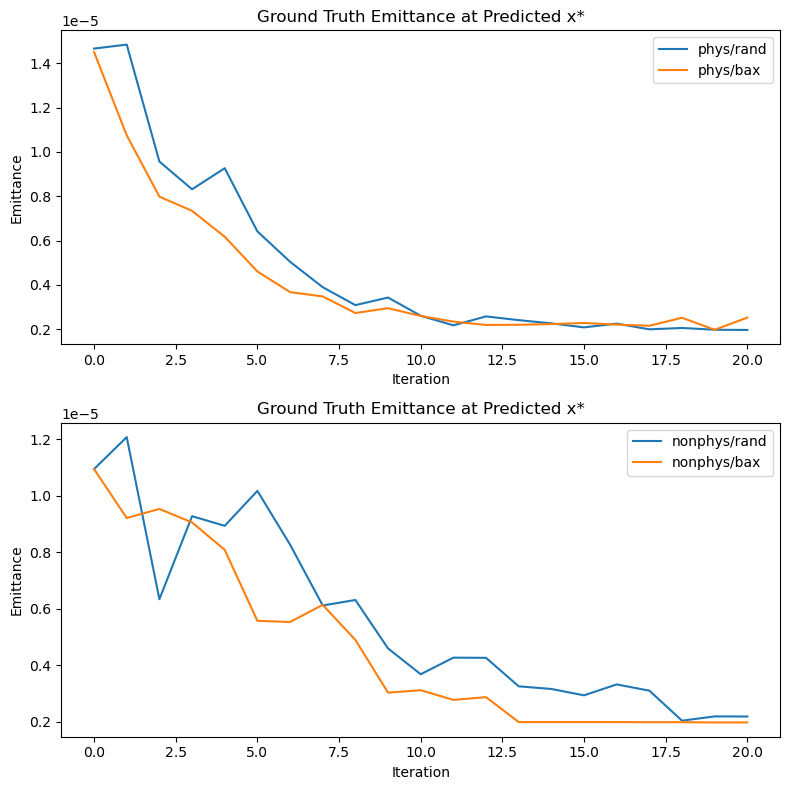

In [9]:
fig, axes = plt.subplots(2)
fig.set_size_inches((8, 8))

ax = axes[0]
ax.plot(torch.mean(gt_emits_at_x_star_pred_phys_rand, dim=0), label='phys/rand')
ax.plot(torch.mean(gt_emits_at_x_star_pred_phys_bax, dim=0), label='phys/bax')
ax.set_title('Ground Truth Emittance at Predicted x*')
ax.set_xlabel('Iteration')
ax.set_ylabel('Emittance')
ax.legend()


ax = axes[1]
ax.plot(torch.mean(gt_emits_at_x_star_pred_nonphys_rand, dim=0), label='nonphys/rand')
ax.plot(torch.mean(gt_emits_at_x_star_pred_nonphys_bax, dim=0), label='nonphys/bax')
ax.set_title('Ground Truth Emittance at Predicted x*')
ax.set_xlabel('Iteration')
ax.set_ylabel('Emittance')
ax.legend()

plt.tight_layout()

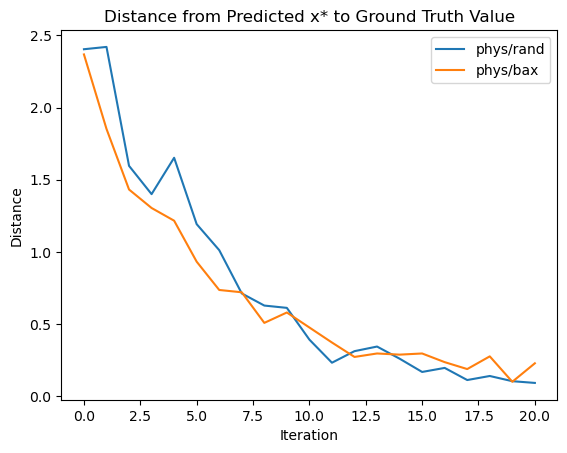

In [10]:
plt.plot(torch.mean(dists_phys_rand, dim=0), label='phys/rand')
plt.plot(torch.mean(dists_phys_bax, dim=0), label='phys/bax')

plt.title('Distance from Predicted x* to Ground Truth Value')
plt.ylabel('Distance')
plt.xlabel('Iteration')
plt.legend()

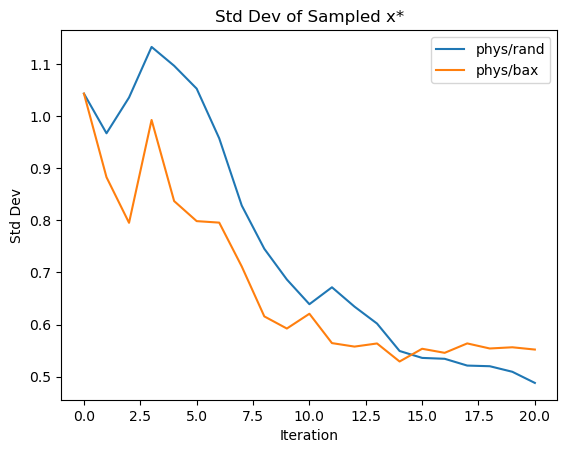

In [11]:
plt.plot(torch.mean(stds_phys_rand, dim=0), label='phys/rand')
plt.plot(torch.mean(stds_phys_bax, dim=0), label='phys/bax')

plt.title('Std Dev of Sampled x*')
plt.ylabel('Std Dev')
plt.xlabel('Iteration')
plt.legend()

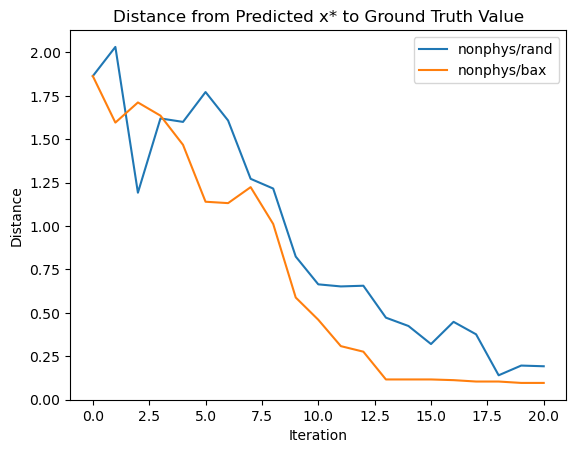

In [11]:
plt.plot(torch.mean(dists_nonphys_rand, dim=0), label='nonphys/rand')
plt.plot(torch.mean(dists_nonphys_bax, dim=0), label='nonphys/bax')

plt.title('Distance from Predicted x* to Ground Truth Value')
plt.ylabel('Distance')
plt.xlabel('Iteration')
plt.legend()

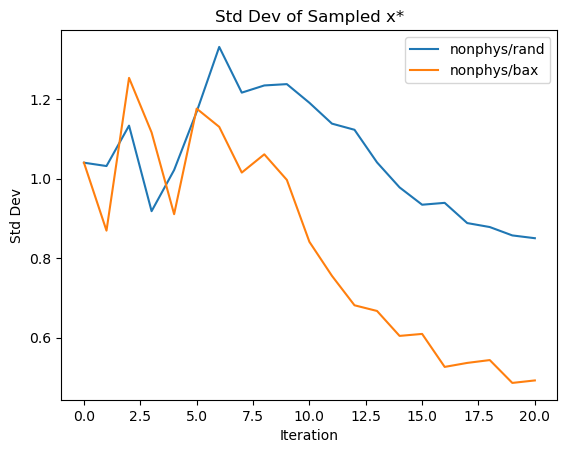

In [12]:
plt.plot(torch.mean(stds_nonphys_rand, dim=0), label='nonphys/rand')
plt.plot(torch.mean(stds_nonphys_bax, dim=0), label='nonphys/bax')

plt.title('Std Dev of Sampled x*')
plt.ylabel('Std Dev')
plt.xlabel('Iteration')
plt.legend()

Trial 1 

Iteration 5:


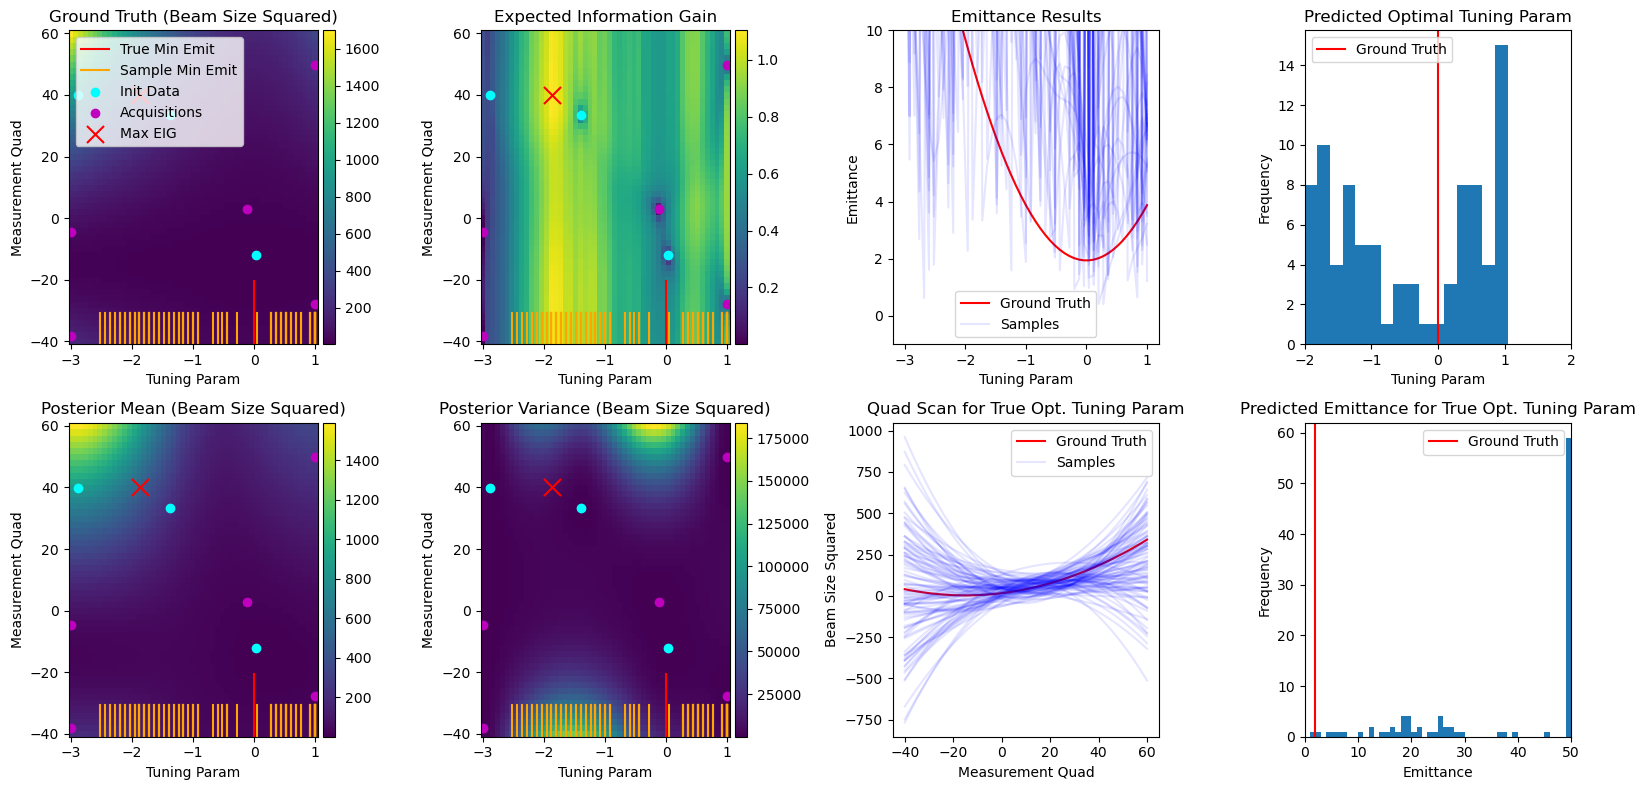

Iteration 6:


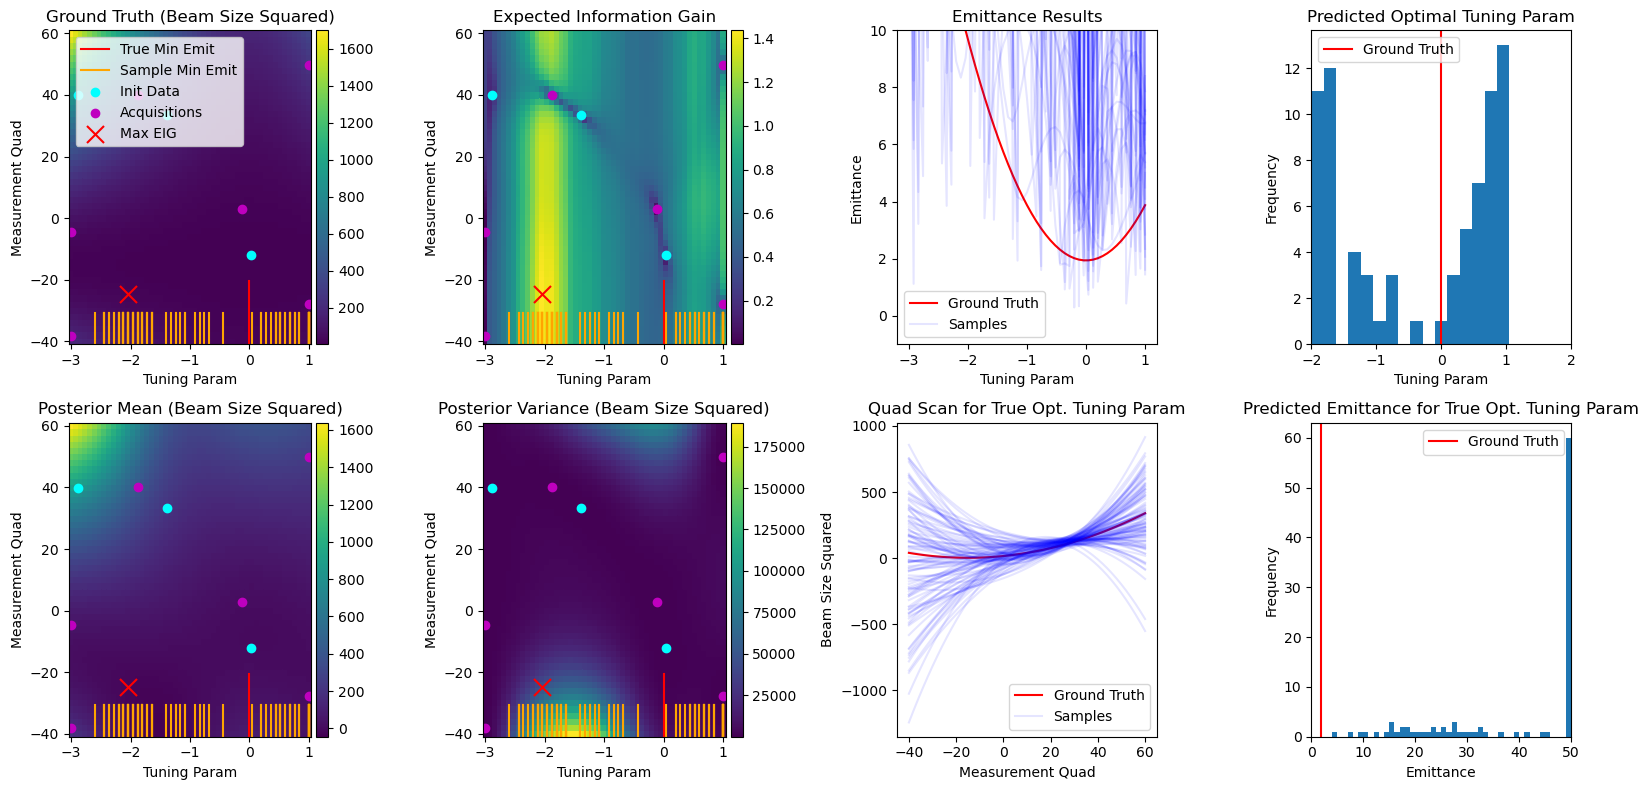

Iteration 7:


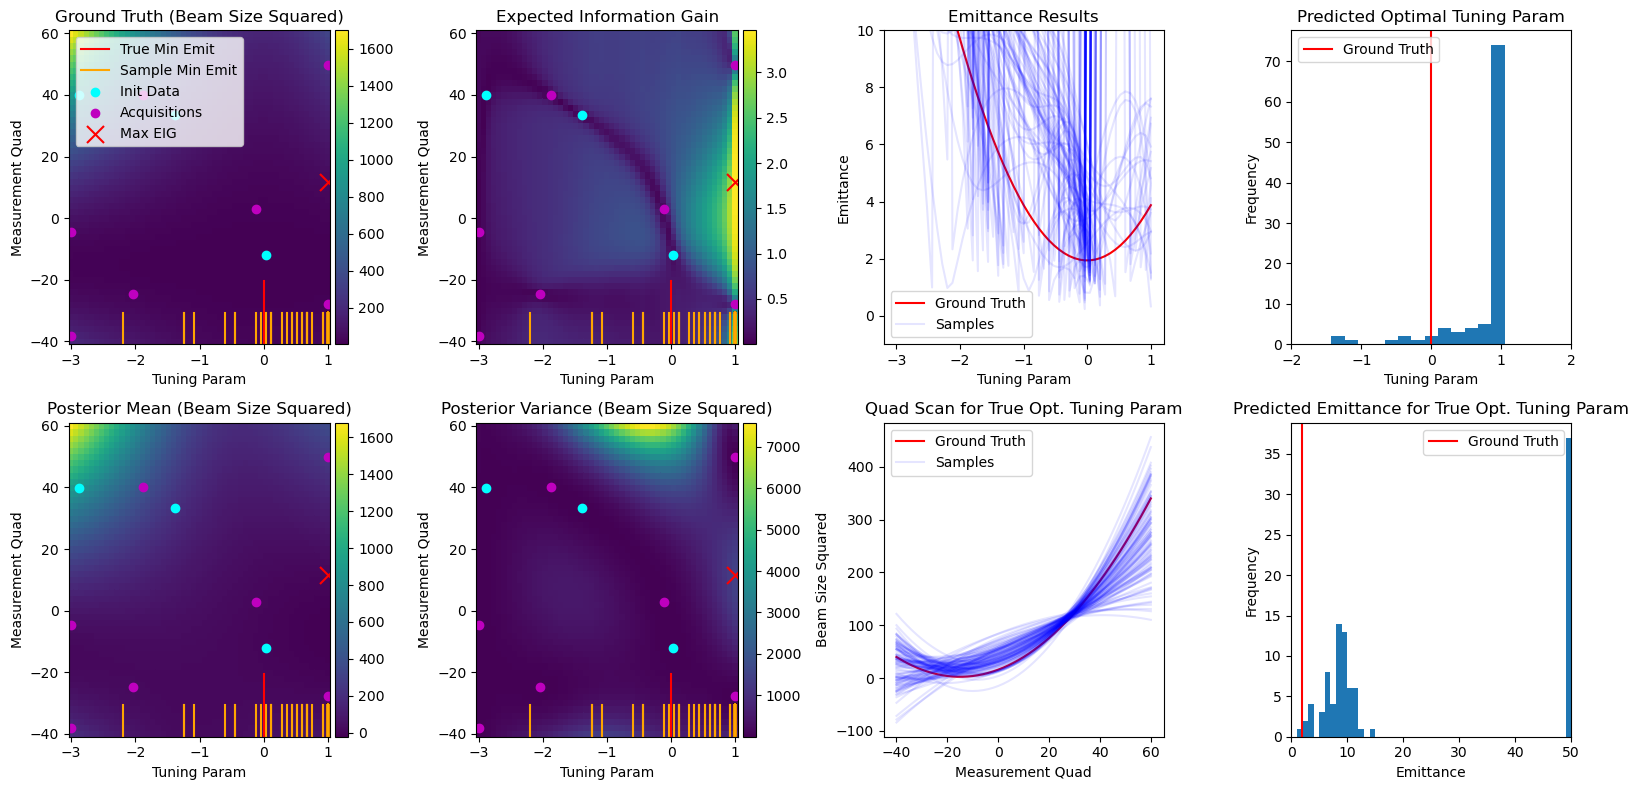

Iteration 8:


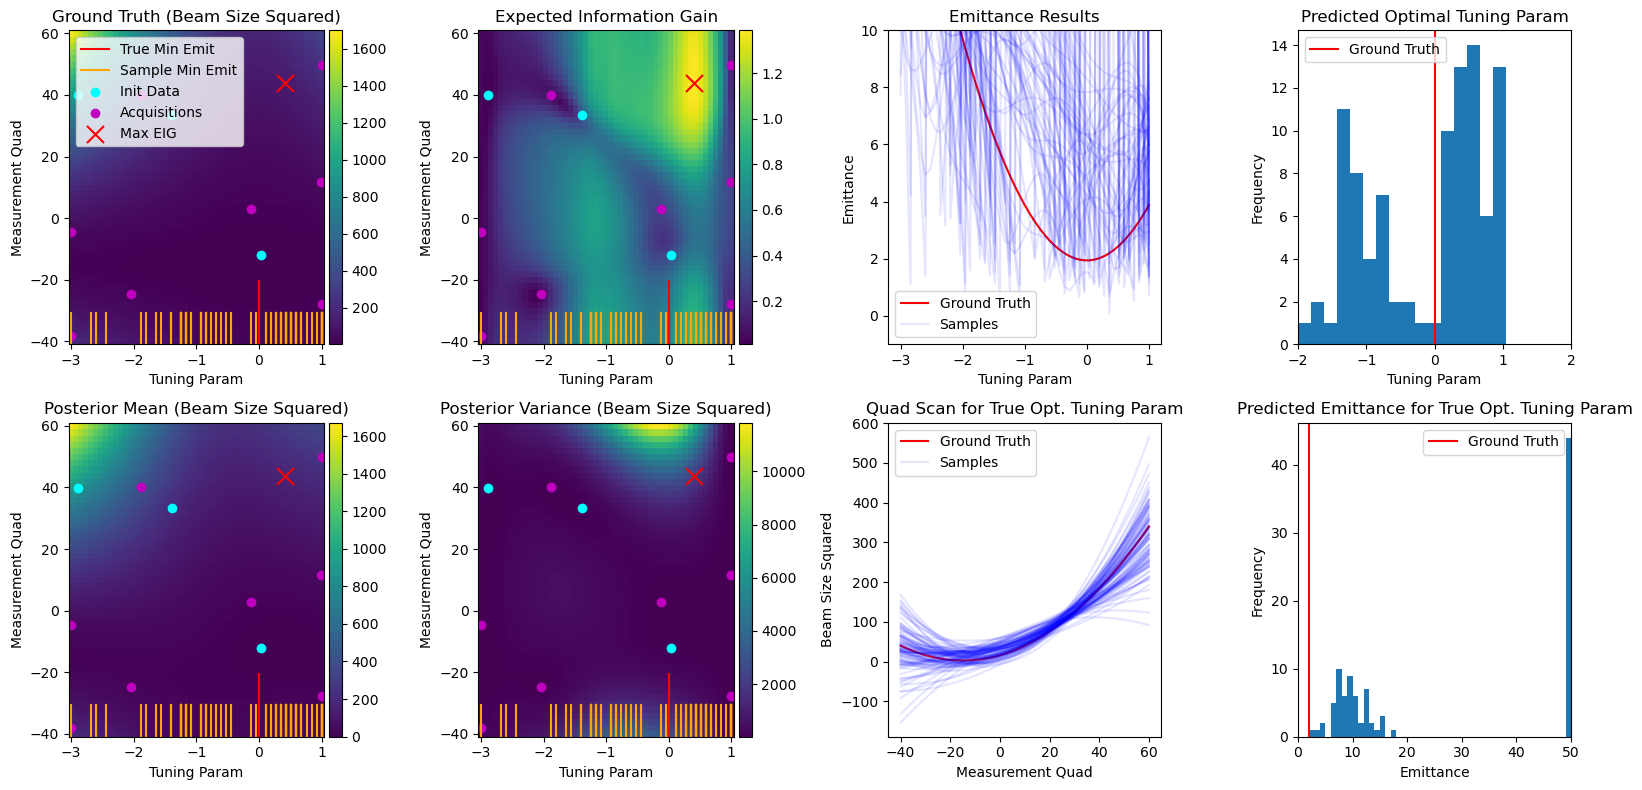

Iteration 9:


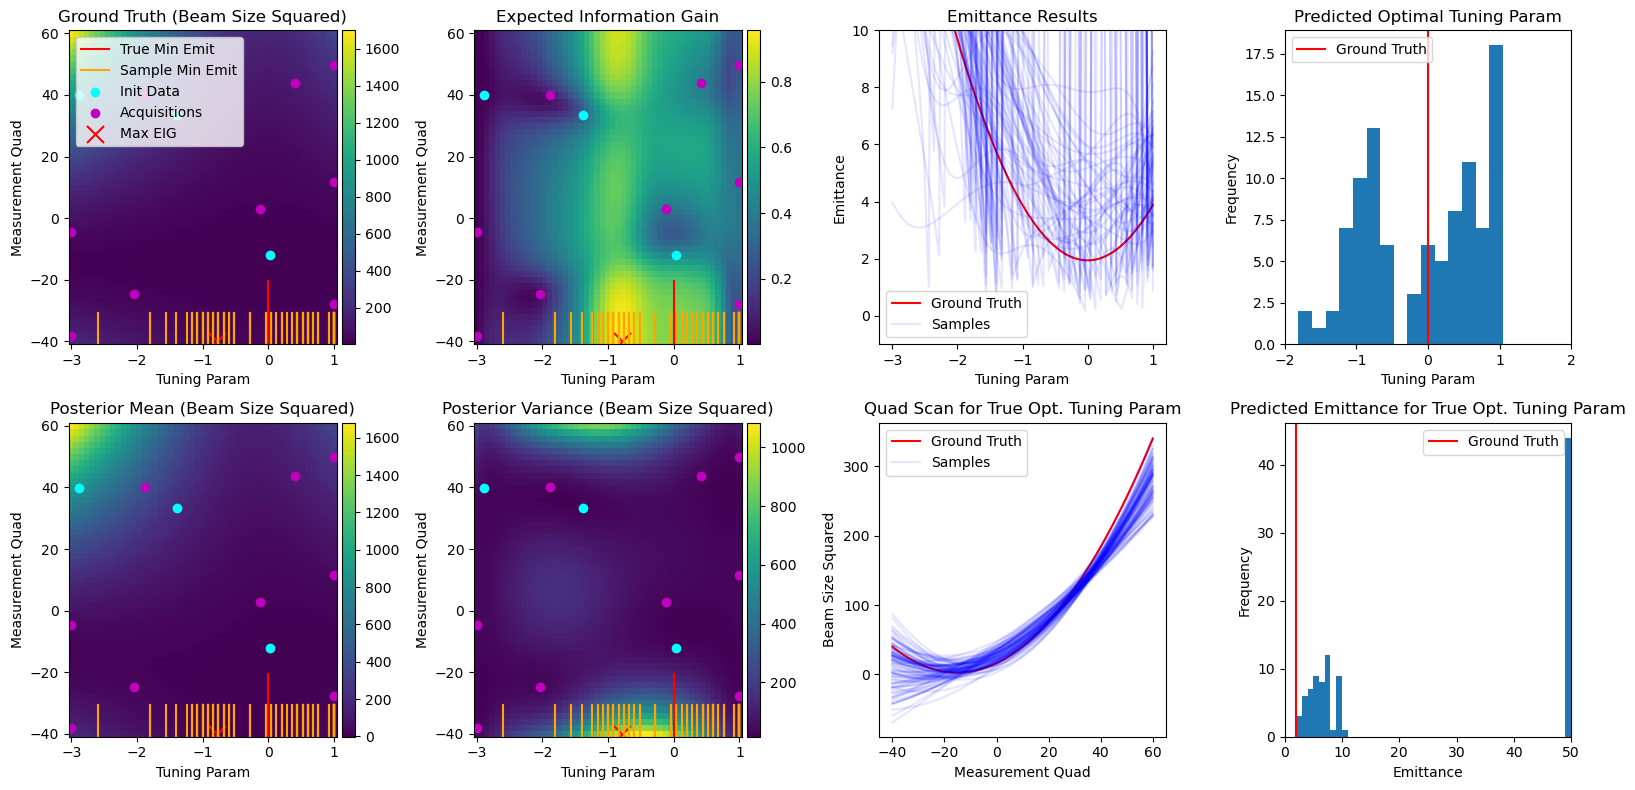

Iteration 10:


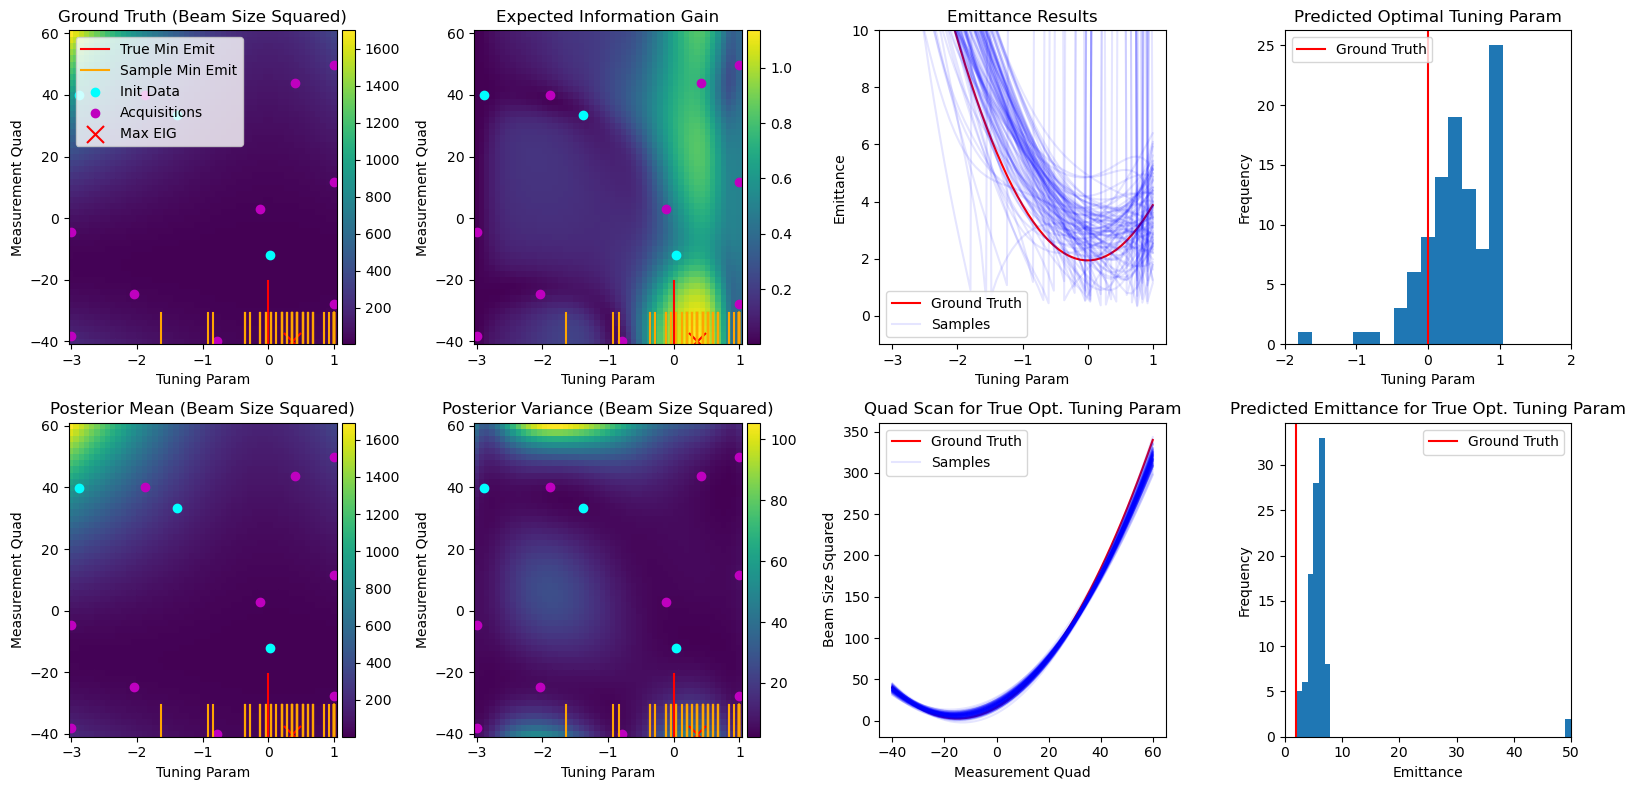

Iteration 11:


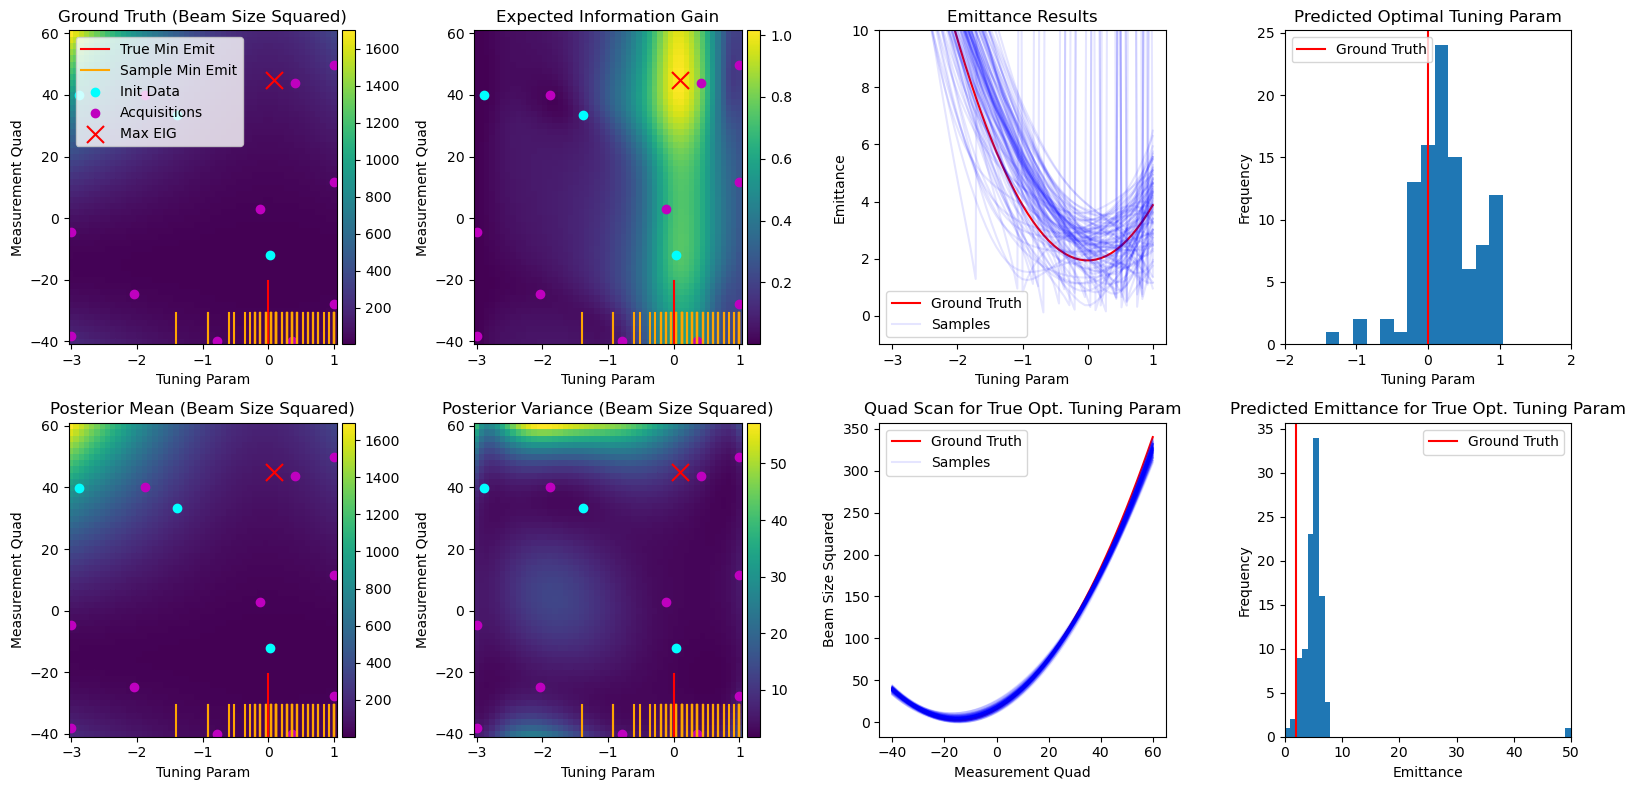

Iteration 12:


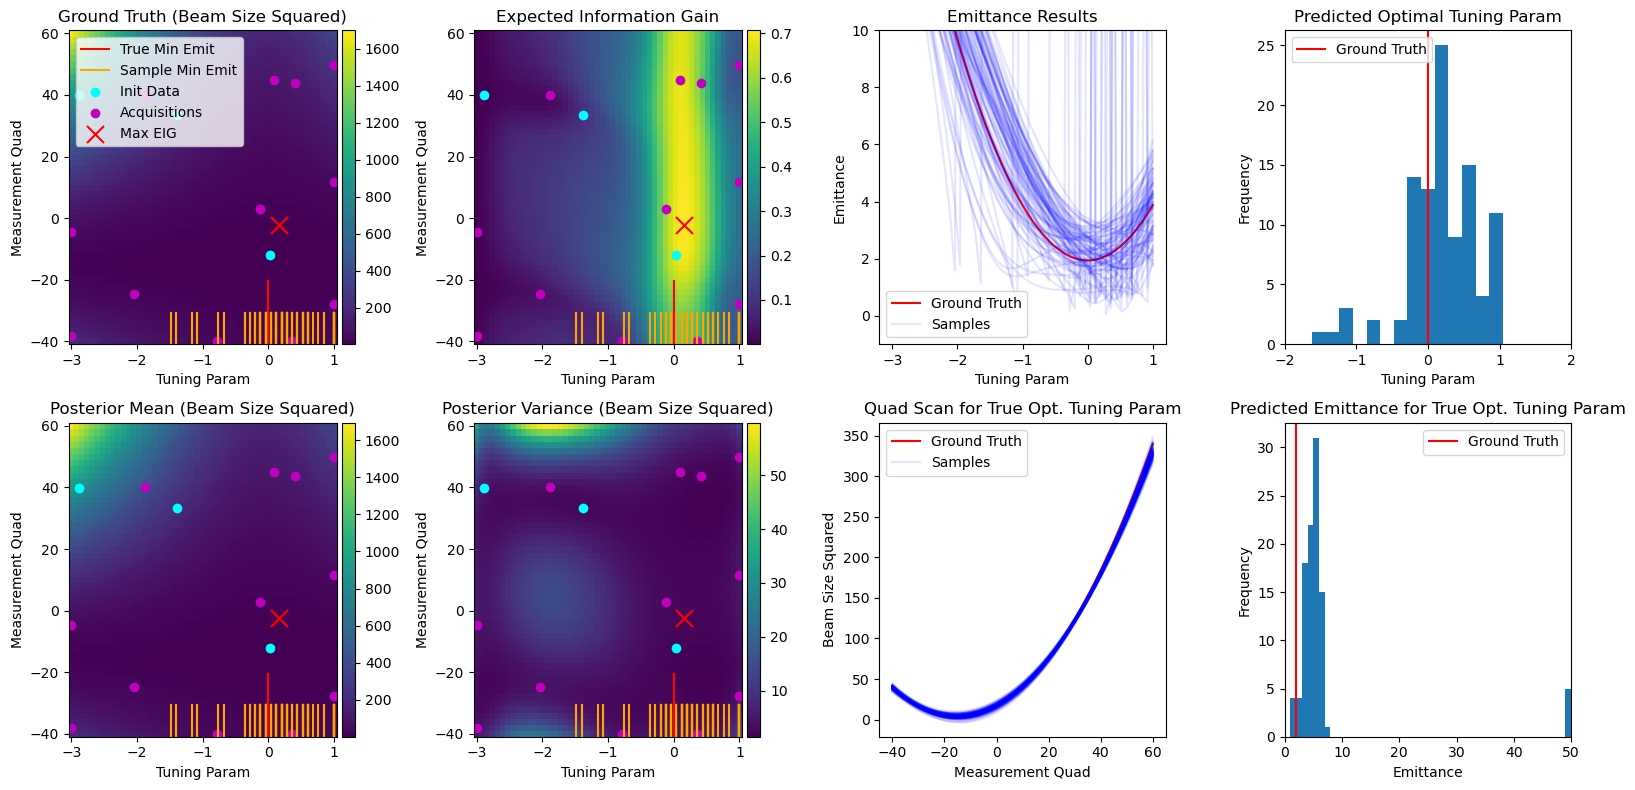

Iteration 13:


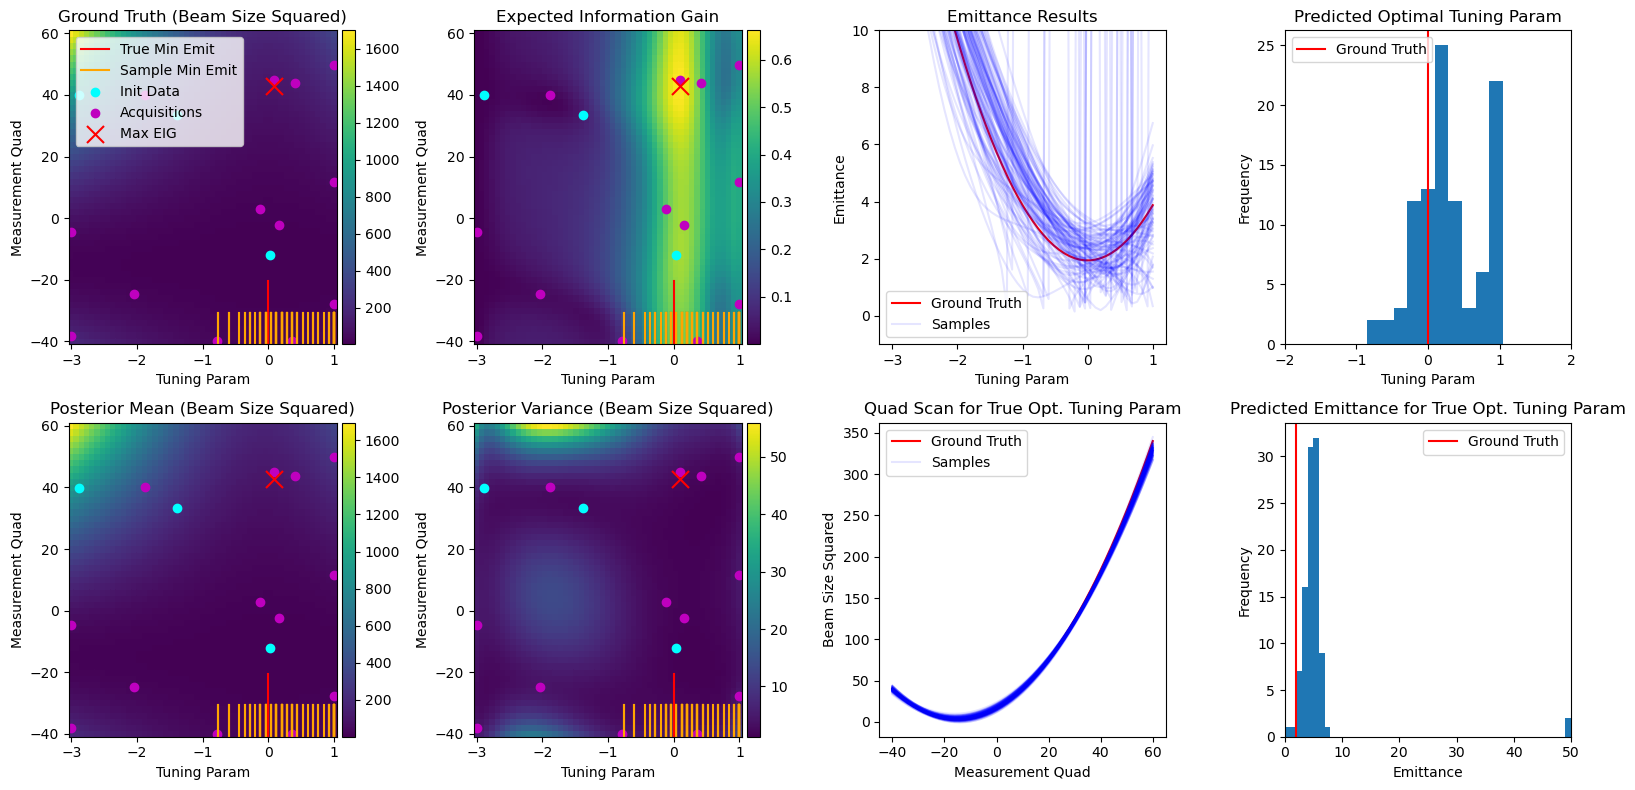

Iteration 14:


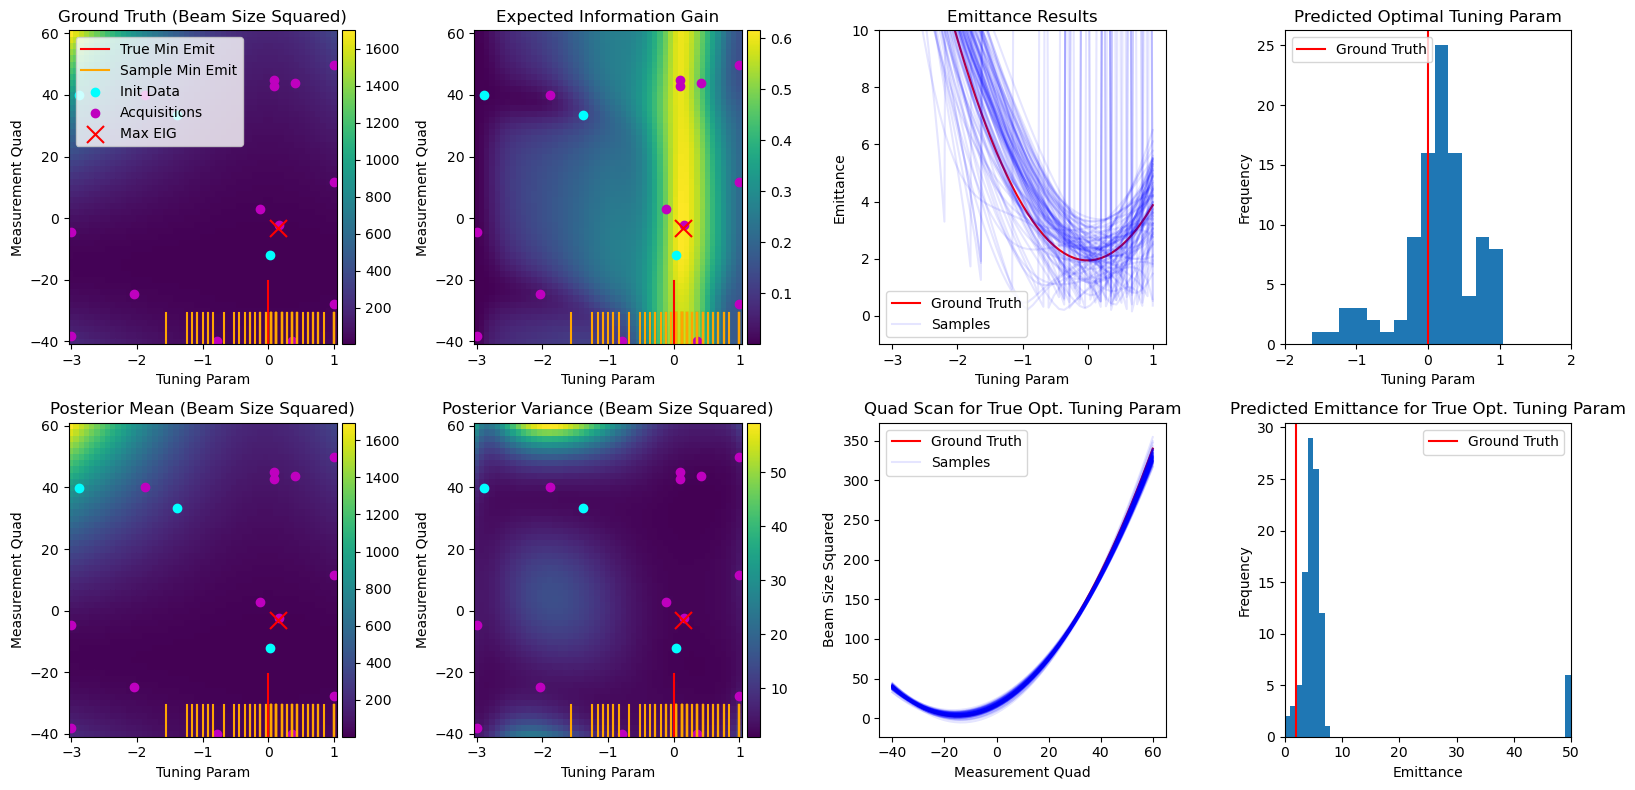

Iteration 15:


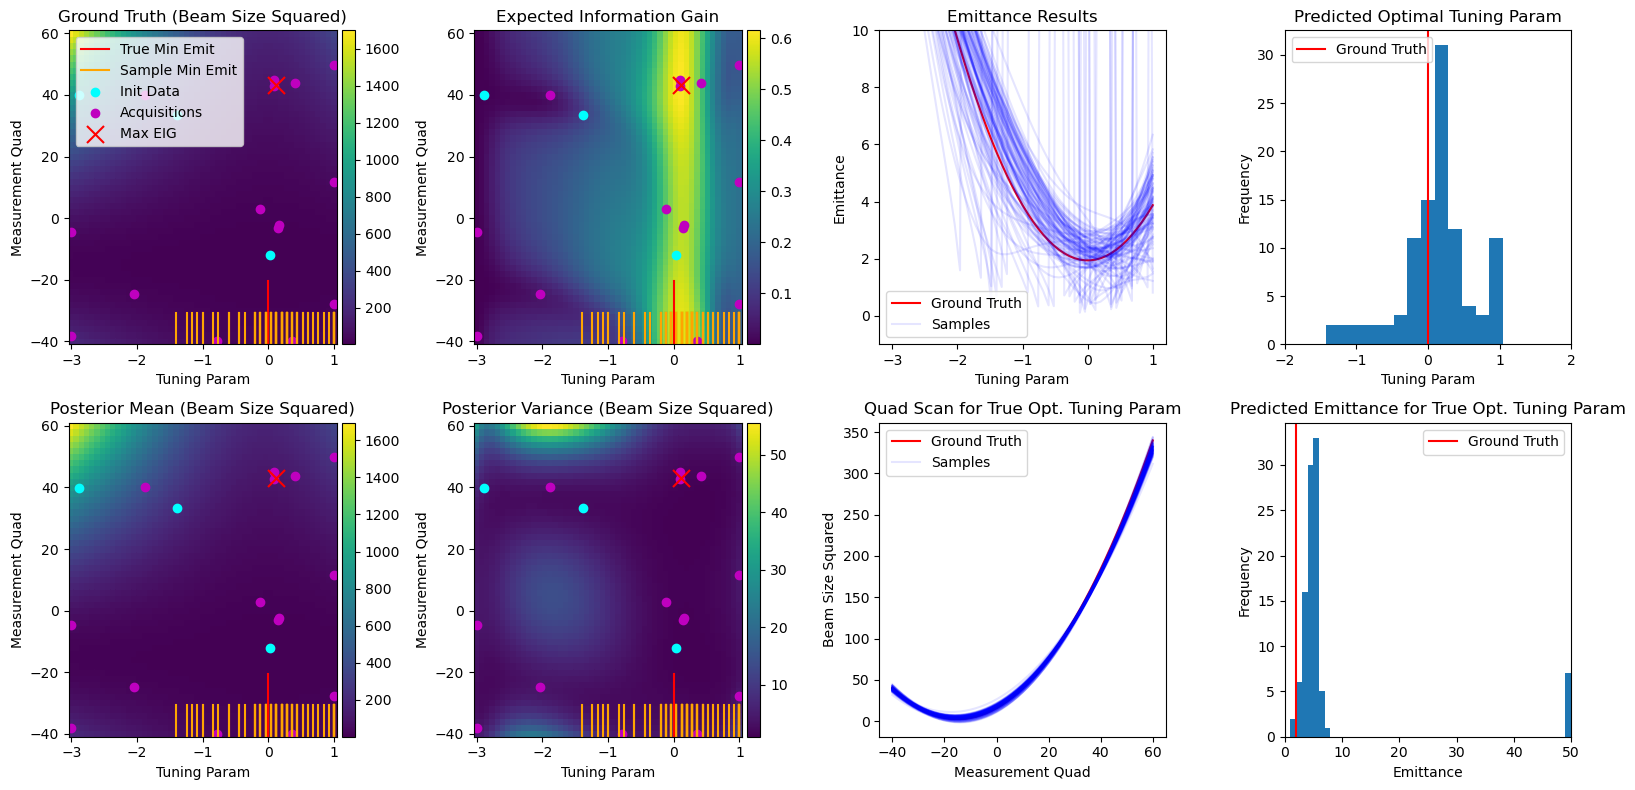

Iteration 16:


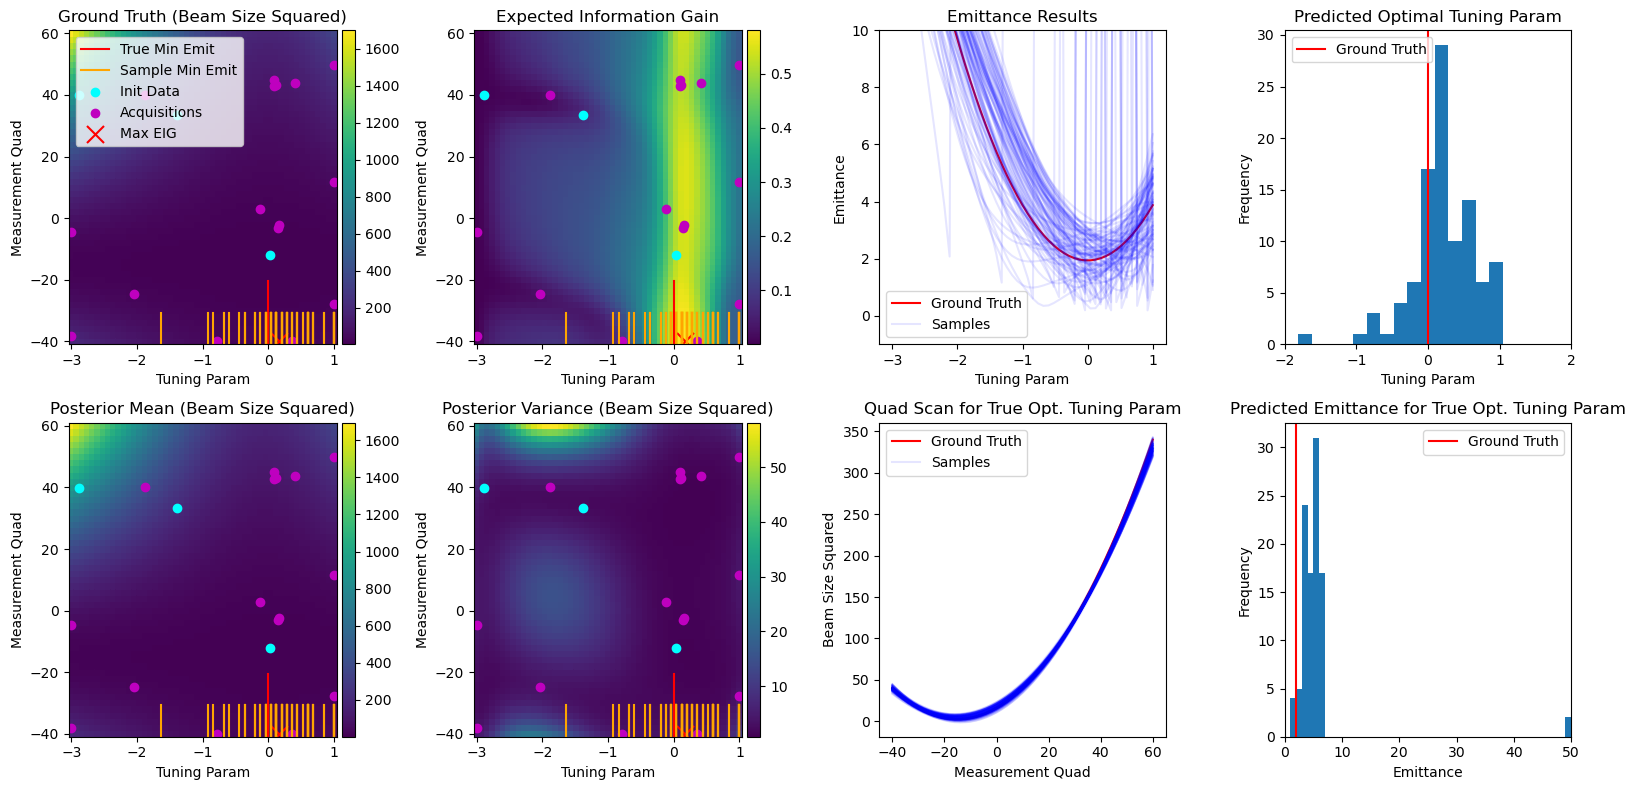

Iteration 17:


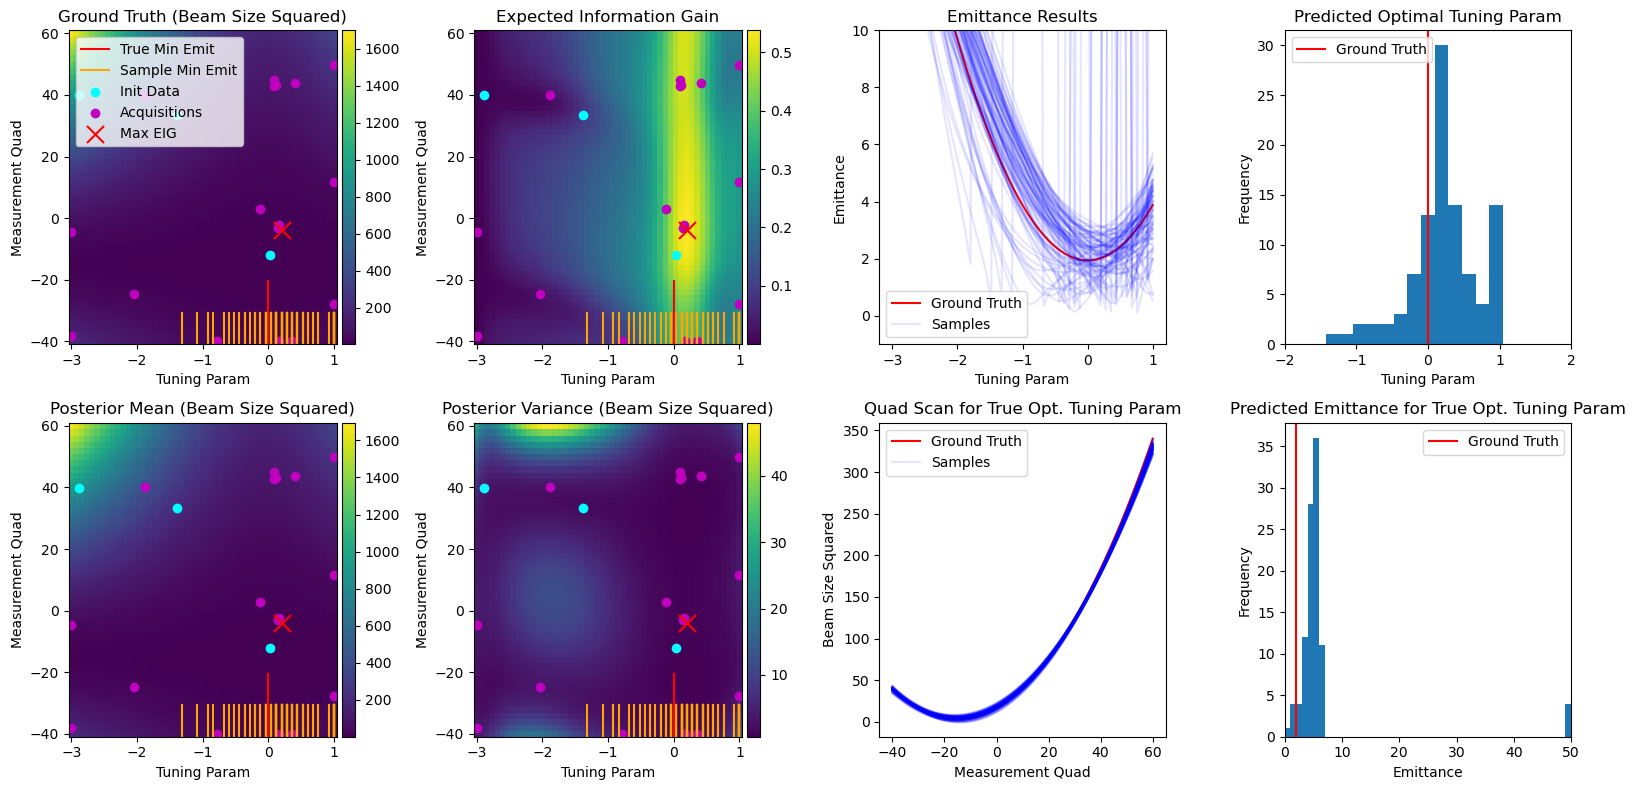

Iteration 18:


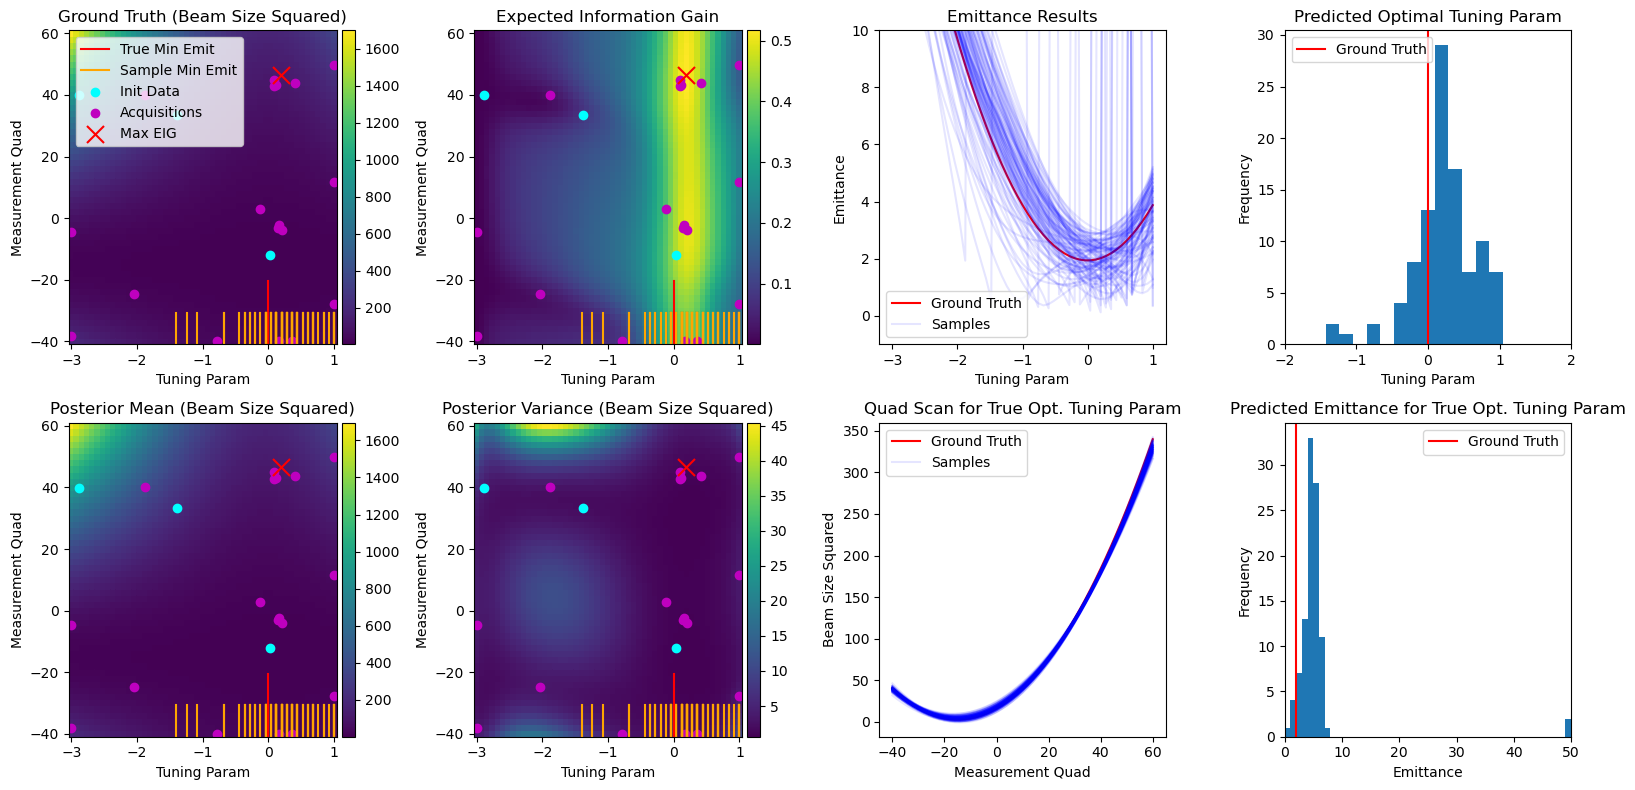

Iteration 19:


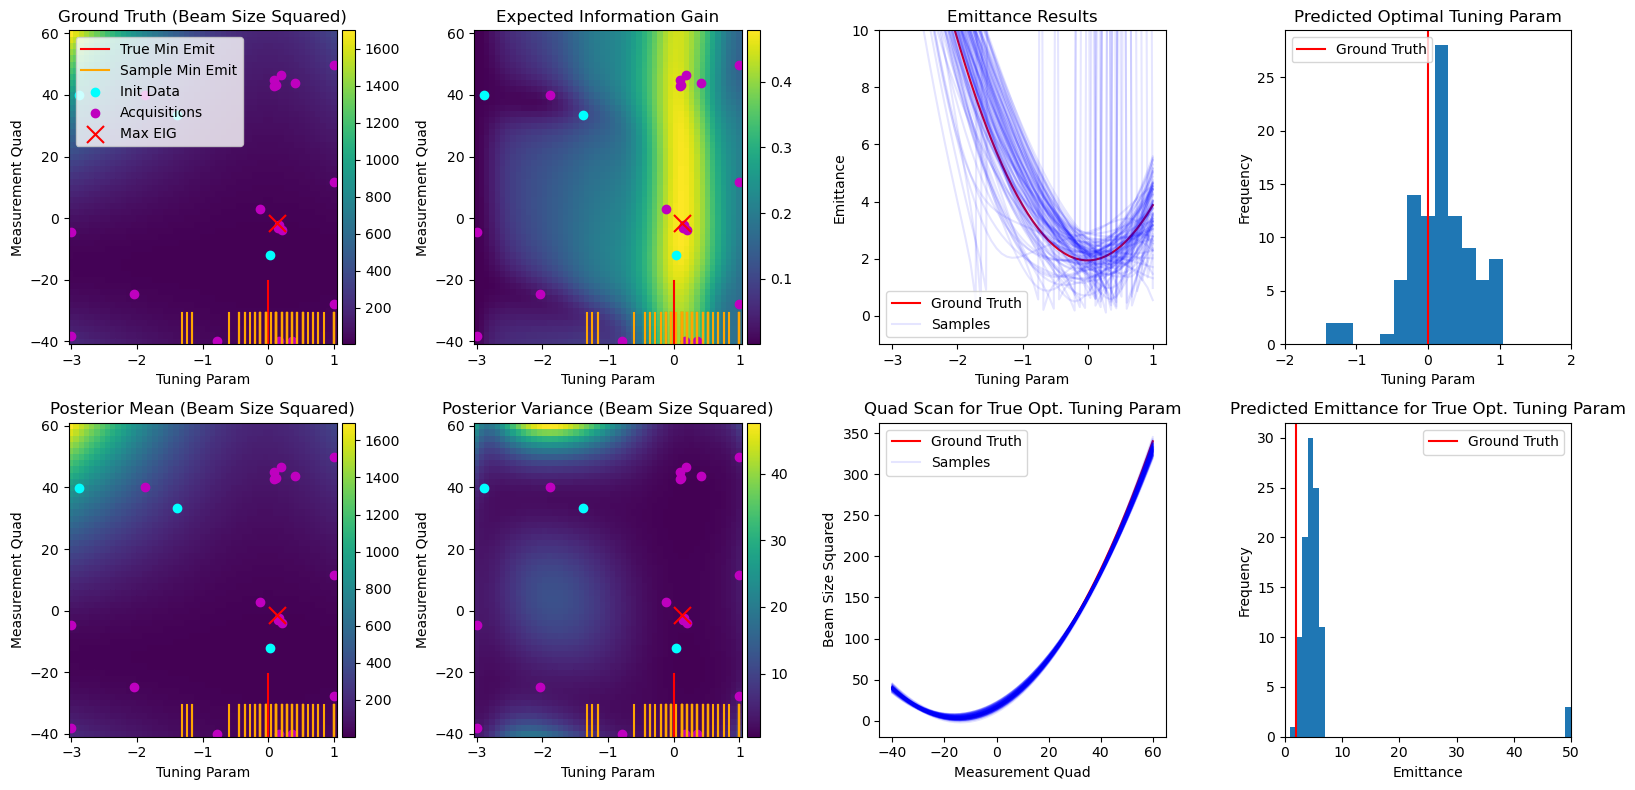

Iteration 20:


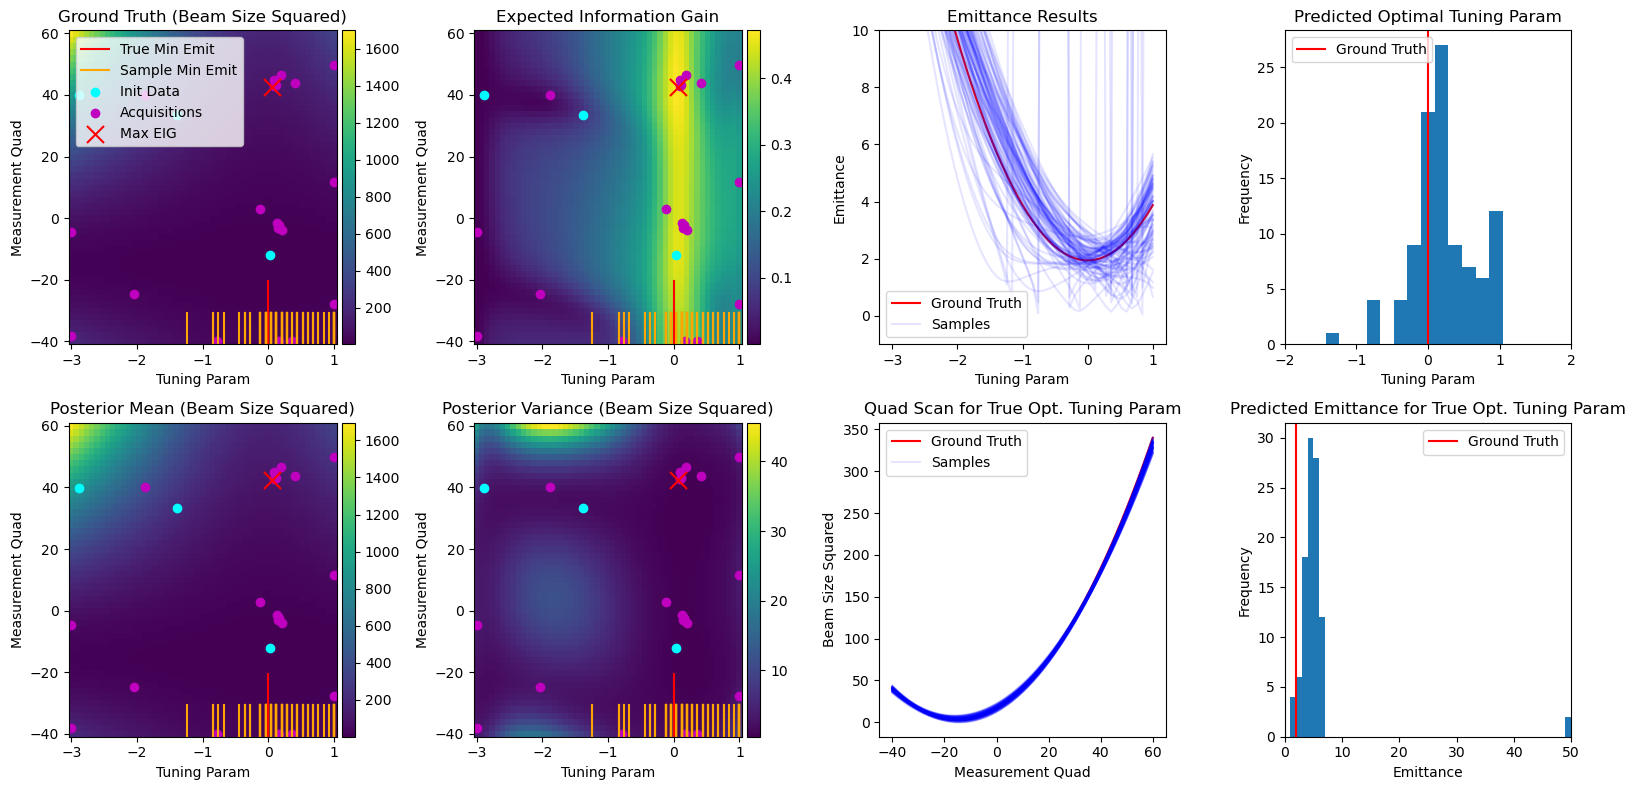

In [13]:
trial_data = trial_data_nonphys_bax
iter_plot2d(1,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

Trial 1 

Iteration 5:


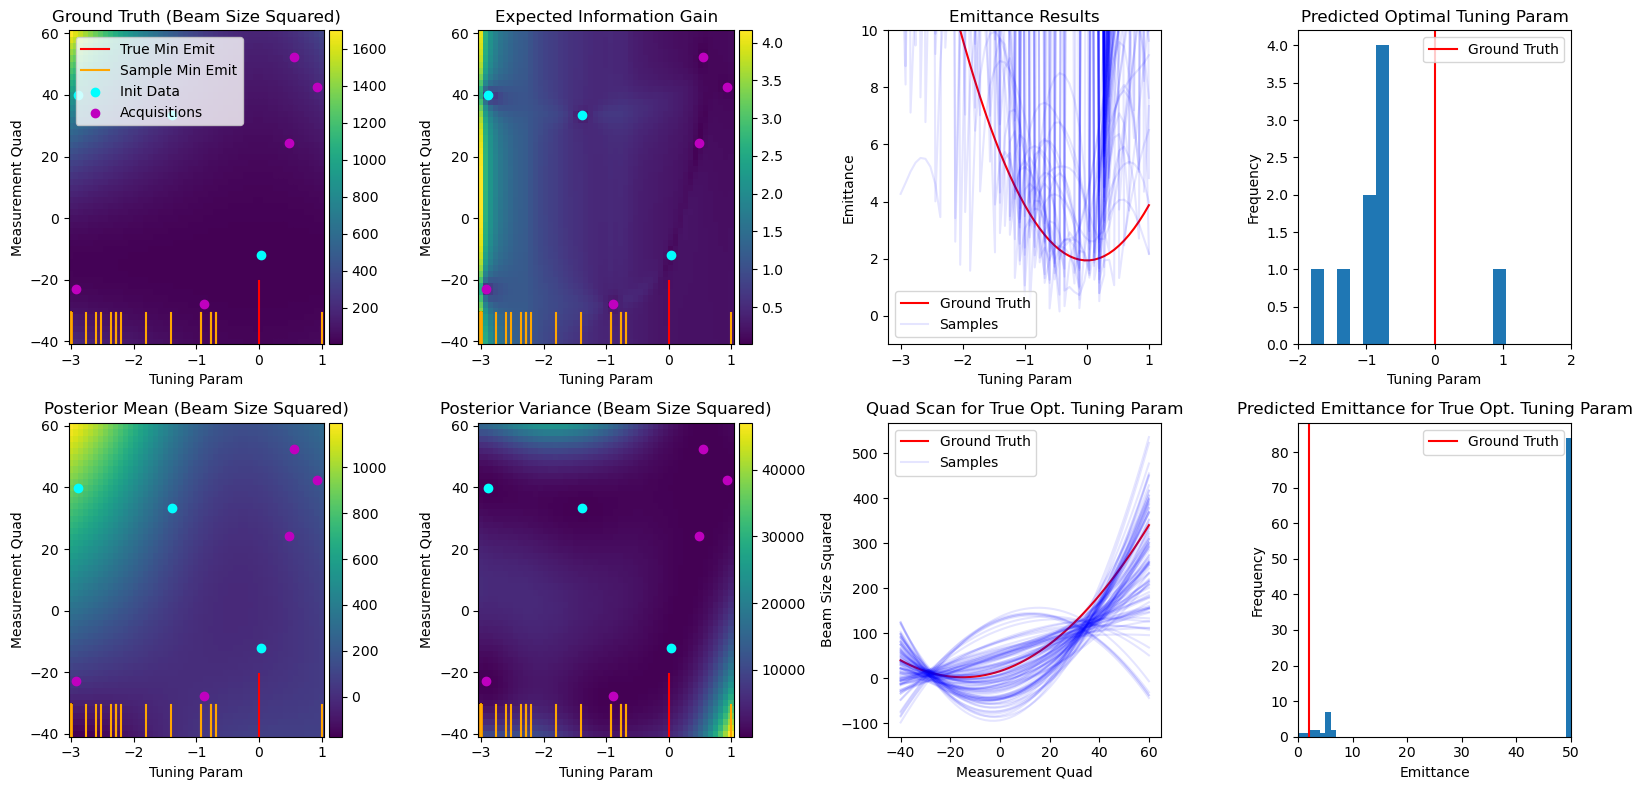

Iteration 6:


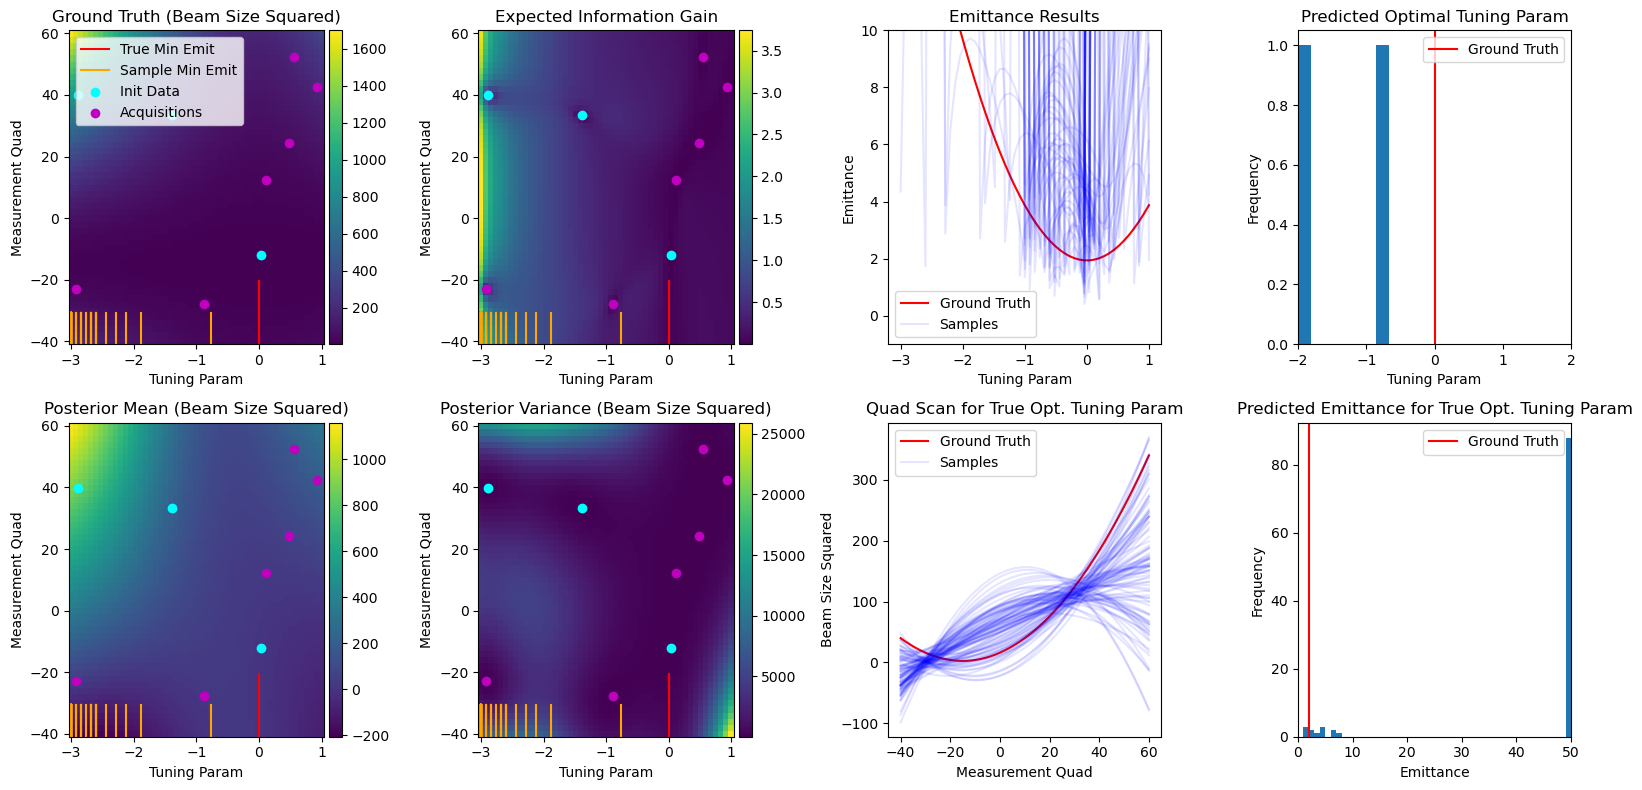

Iteration 7:


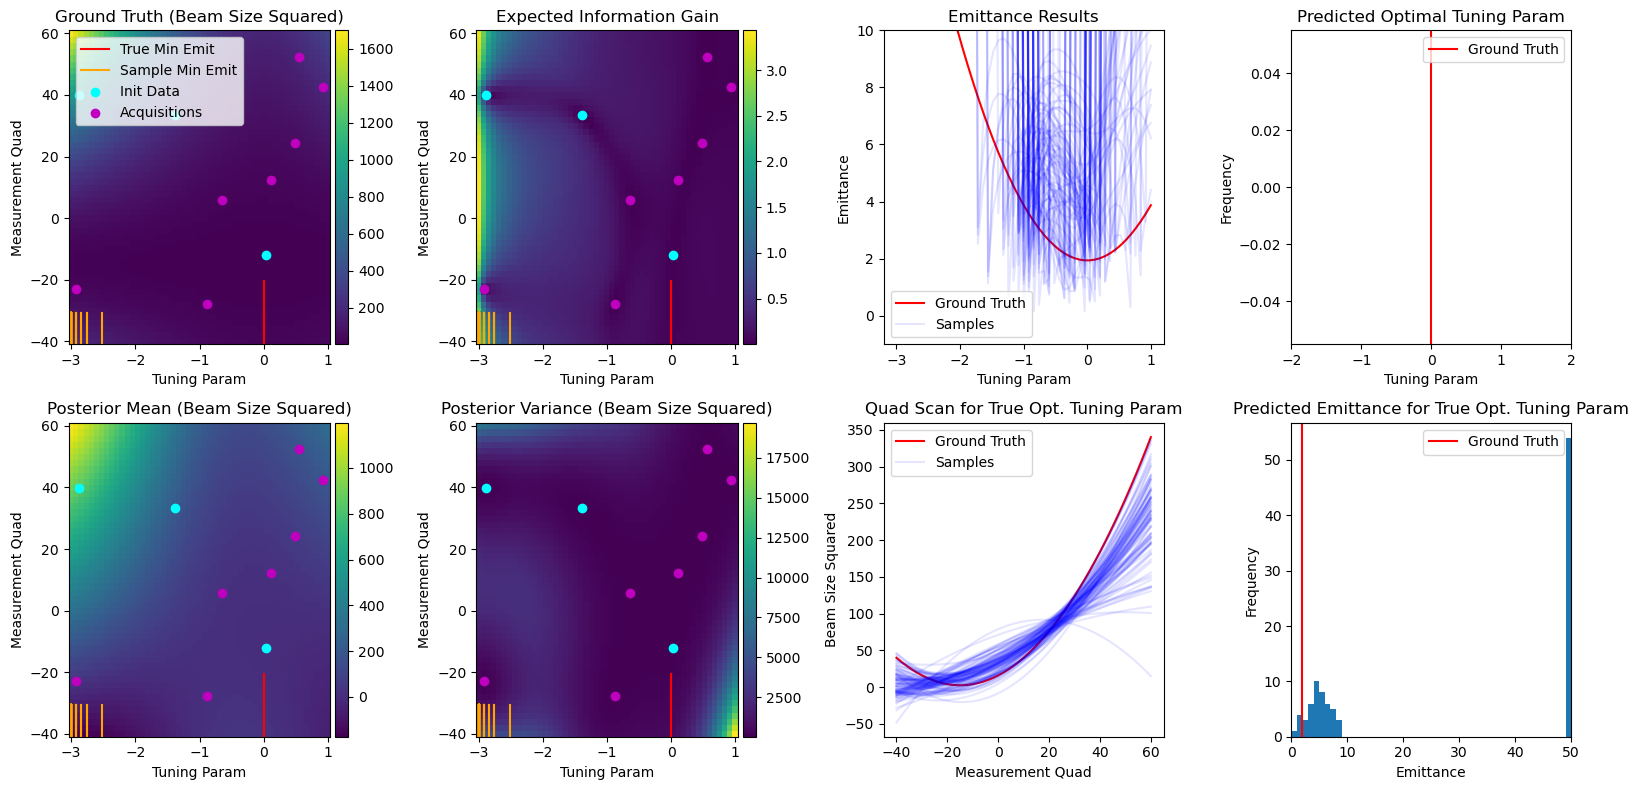

In [14]:
trial_data = trial_data_nonphys_rand
iter_plot2d(1,[5,6,7])

In [15]:
# import dill
# with open('MC-Emittance-Random-2d-Results.pkl', 'wb') as f:
#     dill.dump(trial_data, f)